In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h,c,k

In [2]:
cie = np.loadtxt("CIE1964.txt")
wavelength, x_, y_, z_ = cie[:,0],cie[:,1], cie[:,2], cie[:,3]

In [3]:
wavelength*10**-9

array([3.80e-07, 3.85e-07, 3.90e-07, 3.95e-07, 4.00e-07, 4.05e-07,
       4.10e-07, 4.15e-07, 4.20e-07, 4.25e-07, 4.30e-07, 4.35e-07,
       4.40e-07, 4.45e-07, 4.50e-07, 4.55e-07, 4.60e-07, 4.65e-07,
       4.70e-07, 4.75e-07, 4.80e-07, 4.85e-07, 4.90e-07, 4.95e-07,
       5.00e-07, 5.05e-07, 5.10e-07, 5.15e-07, 5.20e-07, 5.25e-07,
       5.30e-07, 5.35e-07, 5.40e-07, 5.45e-07, 5.50e-07, 5.55e-07,
       5.60e-07, 5.65e-07, 5.70e-07, 5.75e-07, 5.80e-07, 5.85e-07,
       5.90e-07, 5.95e-07, 6.00e-07, 6.05e-07, 6.10e-07, 6.15e-07,
       6.20e-07, 6.25e-07, 6.30e-07, 6.35e-07, 6.40e-07, 6.45e-07,
       6.50e-07, 6.55e-07, 6.60e-07, 6.65e-07, 6.70e-07, 6.75e-07,
       6.80e-07, 6.85e-07, 6.90e-07, 6.95e-07, 7.00e-07, 7.05e-07,
       7.10e-07, 7.15e-07, 7.20e-07, 7.25e-07, 7.30e-07, 7.35e-07,
       7.40e-07, 7.45e-07, 7.50e-07, 7.55e-07, 7.60e-07, 7.65e-07,
       7.70e-07, 7.75e-07, 7.80e-07])

c:\users\rene\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\users\rene\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


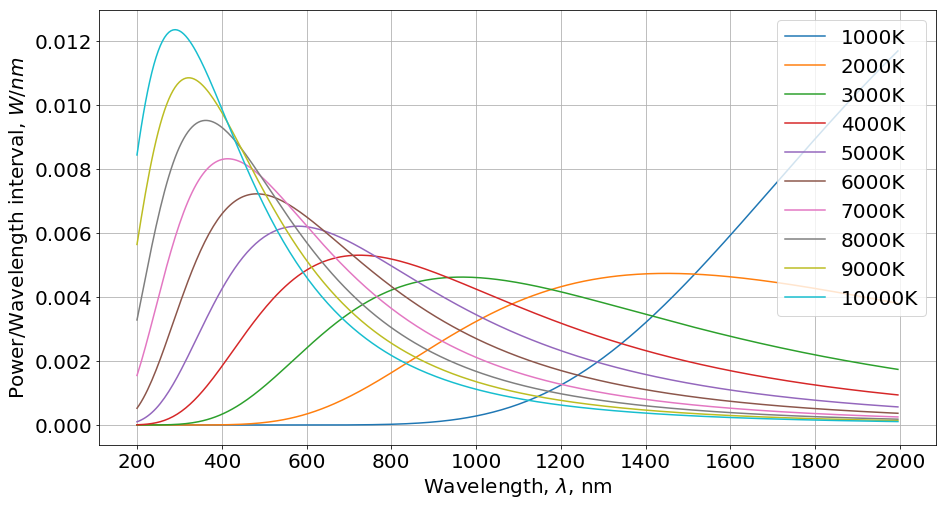

In [4]:
"Blackbody Radiation"

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
from scipy.constants import h,c,k
from mpl_toolkits.axes_grid.inset_locator import inset_axes


fig = plt.figure(figsize=[15,8], facecolor = 'white')
plt.rcParams['axes.titlesize'] = 20
plt.rcParams.update({'font.size': 20})

blackbody_spectrum = np.zeros(shape=[360,10])
wav = np.arange(200e-9,2000e-9,5e-9)

Temp = np.arange(1000,10001,1000)
for T in Temp:


    ax = fig.add_subplot(111)

    def P(wav, T_max,N):
        a = N/(18*((wav**5)*(np.exp((h*c)/(wav*k*T))-1)))
        return a, np.trapz(a)

    b, b_total = P(wav, T, 2e-28)
    #blackbody_spectrum.append(b/b_total)
    blackbody_spectrum[:,Temp.tolist().index(T)] = b/b_total 
    
    wav1 = np.arange(200,2000,5)
    plt.plot(wav1, b/b_total, '-', label = str(T) + 'K')
    plt.xlabel('Wavelength, $\lambda$, nm')
    plt.ylabel('Power/Wavelength interval, $W/nm$')
    plt.legend(loc=1)
    plt.xticks(np.arange(200,2001,200))
plt.grid()

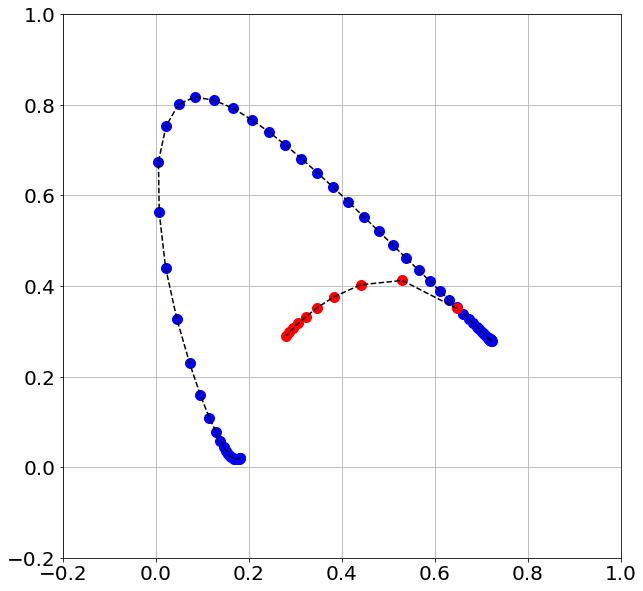

In [23]:
locus_spectrum = np.zeros(shape=[81,10])
for i in range(10):
    a = np.interp(wavelength*10**-9, wav, blackbody_spectrum[:,i])
    locus_spectrum[:,i] = a
    #plt.plot(wavelength, a)
    
def Locus(spectrum, x_, y_, z_):
    X = np.trapz(spectrum*x_)
    Y = np.trapz(spectrum*y_)
    Z = np.trapz(spectrum*z_)
    I = X+Y+Z
    x = X/I
    y = Y/I
    return x,y

x_coord,y_coord = [],[]
for i in range(10):
    x,y = Locus(locus_spectrum[:,i], x_, y_, z_)
    x_coord.append(x)
    y_coord.append(y)
    
xx, yy = [], []
for i in range(len(x_)):
    X = x_[i]
    Y = y_[i]
    Z = z_[i]
    I = X+Y+Z
    xx.append(X/I)
    yy.append(Y/I)
    
plt.figure(figsize=[10,10])
plt.xlim(-0.2,1)
plt.ylim(-0.2 ,1)
plt.plot(xx,yy, 'b.', ms = 20)
plt.plot(xx,yy, 'k--')
plt.plot(x_coord, y_coord, 'r.', ms = 20)
plt.plot(x_coord, y_coord, 'k--')
plt.grid()

In [111]:
spectrum

[]

In [22]:
RGB = np.random.random((32, 32, 3))
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB, 'ITU-R BT.709', colourspaces=['ACEScg', 'S-Gamut', 'Pointer Gamut'])

NameError: name 'plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931' is not defined

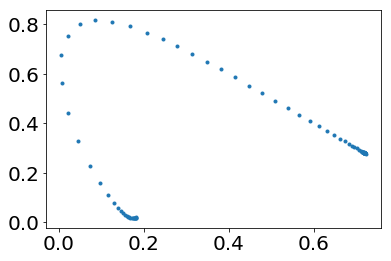

In [16]:
plt.plot(xx,yy, '.')

In [14]:
x_

array([1.60000e-04, 6.62000e-04, 2.36200e-03, 7.24200e-03, 1.91100e-02,
       4.34000e-02, 8.47360e-02, 1.40638e-01, 2.04492e-01, 2.64737e-01,
       3.14679e-01, 3.57719e-01, 3.83734e-01, 3.86726e-01, 3.70702e-01,
       3.42957e-01, 3.02273e-01, 2.54085e-01, 1.95618e-01, 1.32349e-01,
       8.05070e-02, 4.10720e-02, 1.61720e-02, 5.13200e-03, 3.81600e-03,
       1.54440e-02, 3.74650e-02, 7.13580e-02, 1.17749e-01, 1.72953e-01,
       2.36491e-01, 3.04213e-01, 3.76772e-01, 4.51584e-01, 5.29826e-01,
       6.16053e-01, 7.05224e-01, 7.93832e-01, 8.78655e-01, 9.51162e-01,
       1.01416e+00, 1.07430e+00, 1.11852e+00, 1.13430e+00, 1.12399e+00,
       1.08910e+00, 1.03048e+00, 9.50740e-01, 8.56297e-01, 7.54930e-01,
       6.47467e-01, 5.35110e-01, 4.31567e-01, 3.43690e-01, 2.68329e-01,
       2.04300e-01, 1.52568e-01, 1.12210e-01, 8.12610e-02, 5.79300e-02,
       4.08510e-02, 2.86230e-02, 1.99410e-02, 1.38420e-02, 9.57700e-03,
       6.60500e-03, 4.55300e-03, 3.14500e-03, 2.17500e-03, 1.506

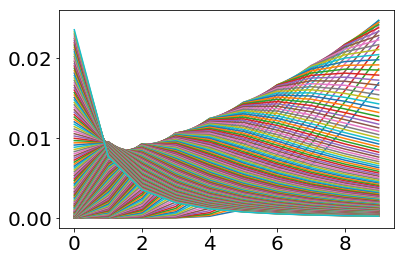

In [70]:
plt.plot(blackbody_spectrum[:])
plt.show()

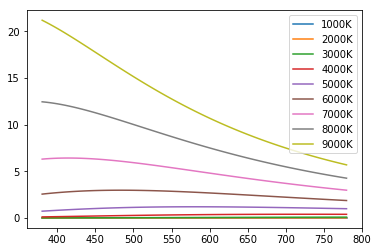

In [51]:
for T in np.arange(1000,10000,1000):
    def P(wav, T, N):
    #wav = wav*10**-9
        a = N/(18*((wav**5)*(np.exp((h*c)/(wav*k*T))-1)))
        return a, np.trapz(a)
    
    b, b_ = P(wavelength*10**-9, T, 2e-28)
    plt.plot(wavelength, b, label = str(T) + 'K')
    plt.legend()

In [34]:
np.arange(500,20000,200)

array([  500,   700,   900,  1100,  1300,  1500,  1700,  1900,  2100,
        2300,  2500,  2700,  2900,  3100,  3300,  3500,  3700,  3900,
        4100,  4300,  4500,  4700,  4900,  5100,  5300,  5500,  5700,
        5900,  6100,  6300,  6500,  6700,  6900,  7100,  7300,  7500,
        7700,  7900,  8100,  8300,  8500,  8700,  8900,  9100,  9300,
        9500,  9700,  9900, 10100, 10300, 10500, 10700, 10900, 11100,
       11300, 11500, 11700, 11900, 12100, 12300, 12500, 12700, 12900,
       13100, 13300, 13500, 13700, 13900, 14100, 14300, 14500, 14700,
       14900, 15100, 15300, 15500, 15700, 15900, 16100, 16300, 16500,
       16700, 16900, 17100, 17300, 17500, 17700, 17900, 18100, 18300,
       18500, 18700, 18900, 19100, 19300, 19500, 19700, 19900])

In [9]:
wavelength, x_, y_, z_ = cie[:,0],cie[:,1], cie[:,2], cie[:,3]

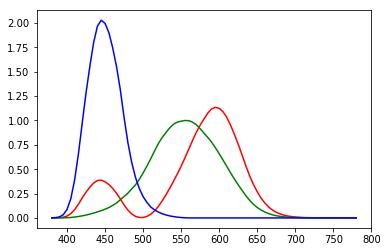

In [10]:
plt.plot(wavelength, x_, 'r', wavelength, y_, 'g', wavelength, z_, 'b', aa = True)